# W7 - October 4 - SciPy: Basics

SciPy is a third-party library (not in the Standard Libraray), included with the Anaconda Distribution. Hence, you don't need to install it in the default Anaconda environment (`base`).

**Why use SciPy?**

The `scipy` package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc. As `scipy` is a huge package, it's more common to import the specific modules/functions that you need instead of the whole package.

https://docs.scipy.org/doc/scipy/

https://scipy-lectures.org/

## SciPy vs NumPy

SciPy is the core package for scientific routines in Python, and is meant to operate efficiently on NumPy arrays. So NumPy and SciPy work hand in hand, with Matplotlib used to easily plot data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NumPy is written in C, while SciPy is written in Python, making Numpy a lot faster for basic computations. In fact, SciPy consists of all the NumPy functions, but they are slower than their NumPy counterparts due to the difference in computation speed between Python and C.

For most cases, you would use NumPy for it's array object, basic operations likes sorting and indexing, elementwise operations using universal functions (`ufuncs` like `np.sin()`), and other array manipulations. SciPy, on the other hand, contains all the algebraic functions and is more powerful, efficient, and flexible in solving scientific problems. While NumPy does offer some features that overlap with those of SciPy, the former is often less powerful, and not in a full-fledged form.

For example, the sub-module `numpy.linalg` implements basic linear algebra, such as solving linear systems, singular value decomposition, etc. However, it is not guaranteed to be compiled using efficient routines, and thus it is recommended to use `scipy.linalg`.

Just like NumPy, SciPy also has a lot of special funtions: https://docs.scipy.org/doc/scipy/reference/special.html

## Linear Algebra

`scipy.linalg` provides all the standard linear algebra operations, using an efficient implementation.

https://docs.scipy.org/doc/scipy/reference/linalg.html

In [2]:
from scipy import linalg

In [3]:
a = np.array([[3, 8], [1, 0]])
a

array([[3, 8],
       [1, 0]])

In [4]:
# Calculate the determinant
linalg.det(a)

-8.0

In [5]:
# Calculate the inverse
i = linalg.inv(a)
i

array([[ 0.   ,  1.   ],
       [ 0.125, -0.375]])

In [6]:
# Dot product results in a 2x2 identity matrix
np.dot(a, i)

array([[1., 0.],
       [0., 1.]])

**For non-square matrices**

In [7]:
b = np.array([[3, 8, 10], [1, 0, 20]])
b

array([[ 3,  8, 10],
       [ 1,  0, 20]])

In [8]:
linalg.det(b)

ValueError: expected square matrix

**For singular matrices**

In [ ]:
b = np.array([[5, 3], [10, 6]])
b

In [ ]:
linalg.det(b)

In [ ]:
linalg.inv(b)

**Singlar value decomposition**

In [ ]:
a = np.arange(10,19).reshape((3, 3)) + np.diag([100, 200, 300])
a

In [ ]:
u, spec, vh = linalg.svd(a)

In [ ]:
u

In [ ]:
spec

In [ ]:
vh

Re-compose the original matrix

In [ ]:
s = np.diag(spec)
svd_mat = u.dot(s).dot(vh)
svd_mat

In [ ]:
# Test if both arrays are element-wise equal (within a tolerance).
np.allclose(svd_mat, a)

## Interpolation

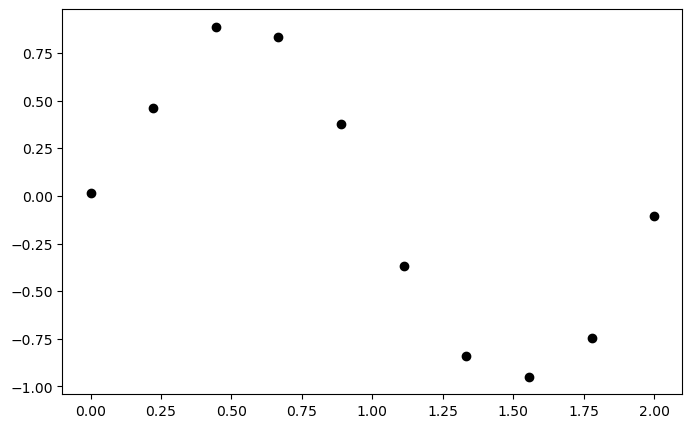

In [9]:
time = np.linspace(0, 2, 10)

# Add arbitrary noise (normally distributed)
noise = np.random.normal(0, 0.1, time.shape)

measures = np.sin(np.pi*time) + noise

# Plot data
plt.figure(figsize=(8, 5))
plt.plot(time, measures, 'ok', label="Measured data");

**Linear interpolation**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

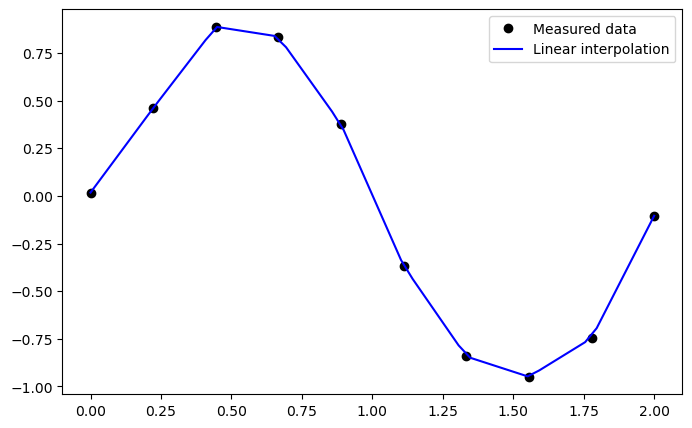

In [11]:
from scipy.interpolate import interp1d  # The 1d is for a 1d array, not for linear

# Linear interpolation is the default
linear_int = interp1d(time, measures)

# Array to plot interpolated function
int_time = np.linspace(0, 2, 50)

# Interpolated curve
linear_int_points= linear_int(int_time)

# Plot data
plt.figure(figsize=(8, 5))
plt.plot(time, measures, 'ok', label="Measured data")
plt.plot(int_time, linear_int_points, 'b', label="Linear interpolation")
plt.legend();

**Quadratic interpolation**

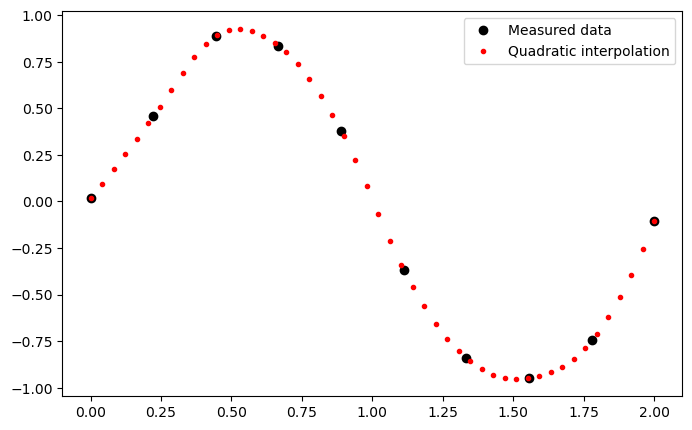

In [17]:
quad_int = interp1d(time, measures, kind="quadratic")  # default is "linear"
quad_int_points = quad_int(int_time)

# Plot data
plt.figure(figsize=(8, 5))
plt.plot(time, measures, 'ok', label="Measured data")
plt.plot(int_time, linear_int_points, '.b', label="Linear interpolation")
plt.plot(int_time, quad_int_points, '.r', label="Quadratic interpolation")
plt.legend();

`scipy.interpolate.interp2d` can be used in a similar fashion for 2D arrays. It is similar to `scipy.interpolate.interp1d`, and we will experiment with this during HW4.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html

**Note: *Interpolation*** points must stay within the range of given data points. Otherwise, it is *extrapolation*.

## Numerical integration

### Integrating a function

https://docs.scipy.org/doc/scipy/reference/integrate.html

**Integrating a NumPy ufunc**

For example, `np.sin` from $0$ to $\pi/2$

In [ ]:
from scipy.integrate import quad

result, error = quad(np.sin, 0, np.pi/2)
result  # should be close to 1

In [ ]:
error  # ideally 0

**Integrating a user-defined `lambda` function**

$3x^2 + 2x + 1$ from $0$ to $1$

In [ ]:
# Define function
func = lambda x: 3*x**2 + 2*x + 1

# Integrate
result, error = quad(func, 0, 1)
result  # should be close to 3

Other integration routines are available: https://docs.scipy.org/doc/scipy/reference/integrate.html

### Integrating an Ordinary Differential Equation (ODE)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

**Simple ODE**

$\frac{dy}{dt} = -y^2$ in the range $y = [0\text{ }1]$, with the initial condition $y(0) = 10$.

First, we need to define the function computing the derivative:

In [ ]:
from scipy.integrate import odeint

# Define function
d_func = lambda y, t: -y**2

# Set up t array
t_array = np.linspace(0, 1, 50)

# Use odeint to obtain y
y_array = odeint(d_func, y0=10, t=t_array)

# Plot
plt.plot(t_array, y_array)
plt.xlabel("$t$")
plt.ylabel("$y$");

**A more complex example**

Consider a damped spring-mass oscillator, where the position of a mass attached to a spring obeys the 2nd order ODE

$y'' + 2 \varepsilon \omega_0  y' + \omega_0^2 y = 0$,

with $\omega_0^2 = k/m$, and $\varepsilon = c/(2 m \omega_0)$

where $k$ the spring constant, $m$ the mass, and $c$ the damping coefficient.

In [ ]:
m = 2  # kg
k = 10  # N/m
c = 1.5  # Ns/m

omega_0 = np.sqrt(k/m)
eps = c / (2*m*np.sqrt(k/m))
eps  # underdamped as eps < 1

For `odeint()`, this 2nd order equation needs to be transformed in a system of two first-order equations: $Y = (y, y')$

In [ ]:
def damped_func(y, t, eps, omega_0):
    return y[1], -2.0 * eps * omega_0 * y[1] - omega_0**2 * y[0]

In [ ]:
# Set up t array
t_array = np.linspace(0, 10, 100)

# Use odeint to obtain y and y'
y_array = odeint(damped_func, y0=(1, 0), t=t_array, args=(eps, omega_0))

plt.plot(t_array, y_array[:, 0], label="$y$")
plt.plot(t_array, y_array[:, 1], label="$y'$")
plt.legend();

## Fast Fourier Transforms (FFTs)

https://docs.scipy.org/doc/scipy/reference/fftpack.html

In [ ]:
from scipy import fftpack

# Generate noisy signal
time, time_step = np.linspace(0, 25, 1000, retstep=True)  # return step as well
noise = np.random.randn(time.size)/2
sig = np.sin(time) + noise

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time, sig)
plt.xlabel("Time")
plt.ylabel("Signal");

In [ ]:
# Compute FFT
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)**2

# Generate sampling frequencies
freqs = fftpack.fftfreq(sig.size, d=time_step)

# As FFTs are symmetric , let's only look at the the positive frequencies
pos_mask = np.where(freqs > 0)
pos_freqs = freqs[pos_mask]

# Peak frequency
peak_freq = pos_freqs[power[pos_mask].argmax()]
print(f"Peak frequency = {peak_freq:.2f}")

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
# FFT
axs[0].plot(freqs, power)
axs[0].set_xlabel("Frequency")
axs[0].set_ylabel("Counts")
axs[0].set_title("FFT");
# Plot peak frequency
axs[1].plot(pos_freqs[:8], power[pos_mask][:8])
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Counts")
axs[1].set_title("Peak Frequency");

**Simple filtering of high frequencies (noise) using FFTs**

In [ ]:
# Create a copy of the signal FFTs and remove everything above the peak frequency
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(freqs) > peak_freq] = 0

# Inverse FFT
filtered_sig = fftpack.ifft(high_freq_fft)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time, sig, label='Original signal')
plt.plot(time, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend();

**Note:** This is actually a pretty terrible way of filtering a signal.

## Signal processing

https://docs.scipy.org/doc/scipy/reference/signal.html

In [ ]:
from scipy import signal

### Butterworth filter

A better way to do filter out noise (like we did above). Let's create the low pass filter.

In [ ]:
# Generate signal with two frequencies
time, time_step = np.linspace(0, 4, 1000, retstep=True)
sig = np.sin(2*np.pi*time) + np.sin(2*np.pi*10*time)  # 1 Hz and 10 Hz

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time, sig)
plt.xlabel("Time")
plt.ylabel("Signal");

In [ ]:
# 5th order (N) Lowpass filter with a cutoff frequency of 8 Hz (Wn)
lp_filter = signal.butter(N=5, Wn=8, btype="lowpass", fs=1000, output="sos")  # lowpass is the default
lp_filtered_sig = signal.sosfilt(lp_filter, sig)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time, lp_filtered_sig)
plt.xlabel("Time")
plt.ylabel("LP Filtered Signal")
plt.title("LP Filtered Signal");

In [ ]:
# 5th order (N) highpass filter with a cutoff frequency of 8 Hz (Wn)
hp_filter = signal.butter(N=5, Wn=8, btype="highpass", fs=1000, output="sos")
hp_filtered_sig = signal.sosfilt(hp_filter, sig)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time, hp_filtered_sig)
plt.xlabel("Time")
plt.ylabel("HP Filtered Signal")
plt.title("HP Filtered Signal");

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(time, hp_filtered_sig + lp_filtered_sig)
plt.xlabel("Time")
plt.ylabel("Recomposed Signal")
plt.title("Recomposed Signal");

### Detrend

Remove linear baseline from signal

In [ ]:
# Create example signal
t = np.linspace(0, 10, 100)
sig = t + np.sin(np.pi*t)

sig_detrended = signal.detrend(sig)

# Plots
plt.figure(figsize=(8, 5))
plt.plot(t, sig, label="Original signal") 
plt.plot(t, sig_detrended, label="Detrended signal") 
plt.legend();

### Peak finding

In [ ]:
x = np.array([2, 5, 15, 1, 3, 8, 12, 20, 1, 2, 8, 10, 2, 0])
t = np.arange(x.size)
plt.plot(t, x, 'b', label="Signal");

In [ ]:
# Find postions of local maxima
max_pos = signal.argrelmax(x)
max_pos

In [ ]:
plt.plot(t, x, 'b', label="Signal")
plt.plot(t[max_pos], x[max_pos], 'ro', label="Local Maxima")
plt.legend();

In [ ]:
# Find postions of local minima
min_pos = signal.argrelmin(x)

plt.plot(t, x, 'b', label="Signal")
plt.plot(t[max_pos], x[max_pos], 'ro', label="Local Maxima")
plt.plot(t[min_pos], x[min_pos], 'gs', label="Local Minima")
plt.legend();

**A much more customizable function** is `scipy.signal.find_peaks()`, where you can customize the properties of the peaks to find. It will also return a dictionary with the peaks matching these properties.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks

In [ ]:
# Simple example
peaks, properties = signal.find_peaks(x)
peaks

In [ ]:
properties

In [ ]:
plt.plot(t, x, 'b', label="Signal")
plt.plot(t[peaks], x[peaks], 'ro', label="Local Maxima")
plt.legend();

In [ ]:
# Adding some constraints for the peak properties
peaks, properties = signal.find_peaks(x, height=15, width=1.5)
peaks

In [ ]:
properties

In [ ]:
plt.plot(t, x, 'b', label="Signal")
plt.plot(t[peaks], x[peaks], 'ro', label="Local Maxima")
plt.legend();

## File I/O

We've already seen how to import CSV files with NumPy:

In [ ]:
data = np.genfromtxt("data.csv", delimiter=",", skip_header=1)
data

SciPy can help us read other types of files. For examples, MATLAB files:

In [ ]:
from scipy import io as spio

# Create arbitrary arrays
a = np.ones((3, 3))
b = np.ones((4, 4))

# Save in MATLAB format
spio.savemat('file.mat', {'a': a, 'b': b}) # savemat expects a dictionary of variables

# Load from MATLAB format (loads as a dictionary)
data = spio.loadmat('file.mat')
data

In [ ]:
# Access variables
data['a']

We will see how to read in image files in the next class.